In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.datasets import load_boston
from sklearn import datasets
from sklearn.model_selection import train_test_split
import math


def linear_predicted(x,w):
  return np.dot(x,w)

def logistic_predicted_sigmoid(x,w):
  return 1/(1+ pow(math.e,-(np.dot(x,w))))
  
def linear_w_update(x,y,alpha,w):

  for j in range(len(w)):
    subtract_part = 0

    for i in range(len(x)):
      subtract_part = subtract_part + (linear_predicted(x[i],w)-y[i])*x[i][j]

    w[j] = w[j] - (alpha*subtract_part)/len(x)

  return w

def logistic_w_update(x,y,alpha,w):

  for j in range(len(w)):
    subtract_part = 0

    for i in range(len(x)):
      subtract_part = subtract_part + (logistic_predicted_sigmoid(x[i],w)-y[i])*x[i][j]*(logistic_predicted_sigmoid(x[i],w))*(1-logistic_predicted_sigmoid(x[i],w))

    w[j] = w[j] - (alpha*subtract_part)/len(x)

  return w



def error_linear(x,y,w):

  J = 0
  for i in range(len(x)):

    J = J + pow((linear_predicted(x[i],w)-y[i]),2)

  J = J/(2*len(x))

  return J

def error_logistic(x,y,w):
  J = 0

  for i in range(len(x)):
    J = J + (y[i]*math.log(logistic_predicted_sigmoid(x[i],w),10)) + ((1-y[i])*math.log(1-logistic_predicted_sigmoid(x[i],w),10))

  J = -J/(len(x))

  return J



def cal_MSE_batch(df,w,alpha,rho,epochs,showPlot):

  a = np.array(df.values)

  x = a[:,0:len(a[0])-1]

  y = a[:,len(a[0])-1]

  J = 0

  prevJ = 0

  itr = 0

  epoch_graph = []
  mse_graph = []

  while True:

    if(itr >= epochs):
      break


    h = []

    

    w = linear_w_update(x,y,alpha,w)
    # w = logistic_w_update(x,y,alpha,w)

    
    J = 0

    J = error_linear(x,y,w)

    # print(J)
    # J = error_logistic(x,y,w)

    mse_graph.append(J)
    epoch_graph.append(itr)


    if(abs(J-prevJ) <= rho):
      break

    prevJ = J
    itr = itr + 1

  

  if(showPlot==1):
    plt.plot(epoch_graph,mse_graph)
    plt.xlabel("EPOCHS")
    # naming the y axis
    plt.ylabel("MSE")
    plt.show()
  return w,J



def cal_MSE_stoch(df,w,alpha,rho,epochs,showPlot):

  a = np.array(df.values)

  x = a[:,0:len(a[0])-1]

  y = a[:,len(a[0])-1]

  J = 0

  prevJ = 0

  itr = 0

  epoch_graph = []
  mse_graph = []

  while True:

    if(itr >= epochs):
      break


    h = []


    for i in range(len(x)):

      # predicted value must be changed
      predicted_value = logistic_predicted_sigmoid(x[i],w)
      # predicted_value = logistic_predicted_sigmoid(x[i],w)
      h.append(predicted_value)

      # gradient
      # J = J + pow(predicted_value - y[i],2)

      # stocastic - logloss
      J = J + (y[i]*math.log(predicted_value,10)) + ((1-y[i])*math.log(1-predicted_value,10))

      for j in range(len(w)):

        # logloss-logistic, gradient-stocastic - MSE
        w[j] = w[j] - alpha*(predicted_value-y[i])*x[i][j]

        # logistic - MSE
        # w[j] = w[j] - alpha*(predicted_value-y[i])*x[i][j]*predicted_value*(1-predicted_value)


    # J = J/(2*len(x))

    J = -J/(len(x))

    

    mse_graph.append(J)
    epoch_graph.append(itr)

    # shuffling.
    df = df.sample(frac = 1)



    if(abs(J-prevJ) <= rho):
      break

    prevJ = J
    itr = itr + 1

  
  # print(mse_graph)
  # print(epoch_graph)

  if(showPlot != ''):
    plt.plot(epoch_graph,mse_graph,label=str(showPlot))
    plt.xlabel("EPOCHS")
    # naming the y axis
    plt.ylabel("MSE")
    plt.legend()
    # plt.show()
  return w,J




def SLP(df,W,alpha,rho,epochs,showPlot):

  a = np.array(df.values)

  X = a[:,0:len(a[0])-1]

  Y = a[:,len(a[0])-1]

  # X input Y output y for one hot encoding
  # one hot encoding
  y = []

  for i in range(len(Y)):
    yi = []
    for j in range(len(classes)):
      if(j==Y[i]):
        yi.append(1)
      else:
        yi.append(0)

    y.append(yi)

  print(y)


  mse_graph = []
  epoch_graph = []

  itr = 1

  prevJ = 0
  while itr <= epochs :

    # df = df.sample(frac = 1)

    a = np.array(df.values)

    X = a[:,0:len(a[0])-1]

    Y = a[:,len(a[0])-1]




    currJ = 0
    for k in range(len(X)) :

      x = X[k]

      d = []

      for w in W:
        d.append(logistic_predicted_sigmoid(x,w))

      sum = 0

      for j in range(len(d)):
        sum += pow(d[j]-y[k][j],2)
      
      sum /= 2

      currJ += sum


      
      for j in range(len(W)):
        for i in range(len(W[j])):
          W[j][i] = W[j][i] + alpha*(y[k][j] - d[j])*x[i]*d[j]*(1-d[j])

    currJ = currJ/len(X)

    epoch_graph.append(itr)
    mse_graph.append(currJ)

    # print('currJ : ',currJ)
    # print('prevJ : ', prevJ)

    # print(abs(currJ - prevJ))


    if(abs(currJ - prevJ) < rho):
      break

    prevJ = currJ
    
    itr += 1

  # print(epoch_graph)
  if(showPlot != ''):

    plt.plot(epoch_graph,mse_graph,label=str(showPlot))
    plt.xlabel("EPOCHS")
    # naming the y axis
    plt.ylabel("MSE")
    plt.legend()
    # plt.show()
  return W,currJ  




def findAccuracy(classes,df,everyClassW,datasetName):

  # Confusion Matrix
  confusionMatrix = np.zeros((len(classes),len(classes)),dtype='int')



  a = np.array(df.values)

  x = a[:,0:len(a[0])-1]

  y = a[:,len(a[0])-1]

  # for each pattern predict H(Xi) for all classes then take max probability

  correctlyPredicted = 0

  for i in range(len(a)):

    predictedForIthPattern = []
    for c in classes:
      predictedForIthPattern.append(logistic_predicted_sigmoid(everyClassW[c],x[i]))
    # print(predictedForIthPattern)

    # predicting the class.
    predictedClass = predictedForIthPattern.index(max(predictedForIthPattern))


    confusionMatrix[predictedClass][int(y[i])] += 1

    if(predictedClass == y[i]):
      correctlyPredicted += 1

  print('Correctly Predicted : ',correctlyPredicted)
  print('Total '+ datasetName +  ' Samples : ', len(a))
  print(datasetName + ' Accuracy : ',(correctlyPredicted*100)/len(a))

  print()
  print('confusionMatrix :' )
  print(confusionMatrix)
  print()




  for i in range(len(confusionMatrix)):
    print('precision for ',i,' class : ',confusionMatrix[i][i]/(sum(confusionMatrix[i])))

  print()

  colWiseSum_ConfusionMatrix = np.sum(confusionMatrix,axis=0)
  for i in range(len(colWiseSum_ConfusionMatrix)):
    print('recall for ',i,' class : ',confusionMatrix[i][i]/(colWiseSum_ConfusionMatrix[i]))

  
  print('\n\n')

  return (correctlyPredicted*100)/len(a)



  
      



82
22
46

[[0, 1, 0], [0, 1, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [0, 1, 0], [1, 0, 0], [0, 0, 1], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [0, 1, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [1, 0, 0], [0, 1, 0], [0, 0, 1], [1, 0, 0], [0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [1, 0, 0], [0, 0, 1], [1, 0, 0], [0, 1, 0], [0, 0, 1], [0, 0, 1], [1, 0, 0], [0, 1, 0], [0, 1, 0], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [1, 0, 0], [0, 1, 0], [1, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 0], [1, 0, 0], [1, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [0, 0, 1], [1, 0, 0], [1, 0, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 0], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 1, 0], [0, 1, 0], [0, 0, 1], [0, 1, 0], [1, 0, 0]]
Train Set : 
Correctly Predicted :  79
Total TrainSet Samples :  82
TrainSet Accuracy :

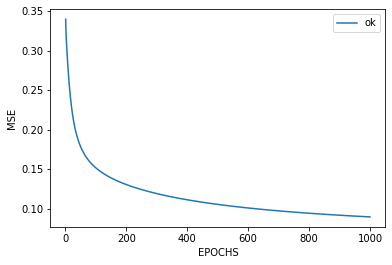

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.datasets import load_boston
from sklearn import datasets
from sklearn.model_selection import train_test_split
import math



'''
PRE-PROCCESSING STARTS
'''



data = pd.DataFrame((datasets.load_iris()).data)
target = pd.DataFrame((datasets.load_iris()).target)


df = data;
df = df/(df.max().max())
df.insert(loc=len(df.columns),column = 'last',value=target)
df.insert(loc=0,column='-1',value=[1 for i in range(len(df))])

# shuffling DataFrame

df = df.sample(frac = 1)

'''

for binary classification
df = df[df['last']!=2]

'''
# df = df[df['last']!=2]

# print(df)

# print(df)

# split the dataset in x:y:z

x = 55
y = 15
z = 30
train_set, reamining_set = train_test_split(df,train_size = x/100)
validation_set, test_set = train_test_split(reamining_set,train_size = y/(y+z))
print(len(train_set))
print(len(validation_set))
print(len(test_set))


test_set = reamining_set




alphaarr = np.array([0.1,0.001,0.1,0.03,0.15])
rhoarr = np.array([0.0001,0.011,0,0.001,0.0001])
epocharr = np.array([100,200,1000,400,500])



# df,w,alpha,rho,epochs


'''
PRE-PROCCESSING ENDS
'''

print()


classes = np.unique(np.array(list(df['last'])))


intialW = [random.uniform(-0.3,0.3) for i in range(len(df.columns)-1)]




W = [intialW.copy() for i in range(len(classes)) ]





returnedW,J = SLP(train_set,W.copy(),0.1,0.00,1000,'ok')


print('Train Set : ')
findAccuracy(classes,train_set,returnedW.copy(),'TrainSet')
findAccuracy(classes,test_set,returnedW.copy(),'TestSet')





print(train_set)

print(test_set)







 

  


   
